In [1]:
from speclib import *

/home/dogg/anaconda3/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


Audio length: 18.0 seconds
Sample rate: 44100 Hz


<module 'matplotlib.pyplot' from '/home/dogg/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

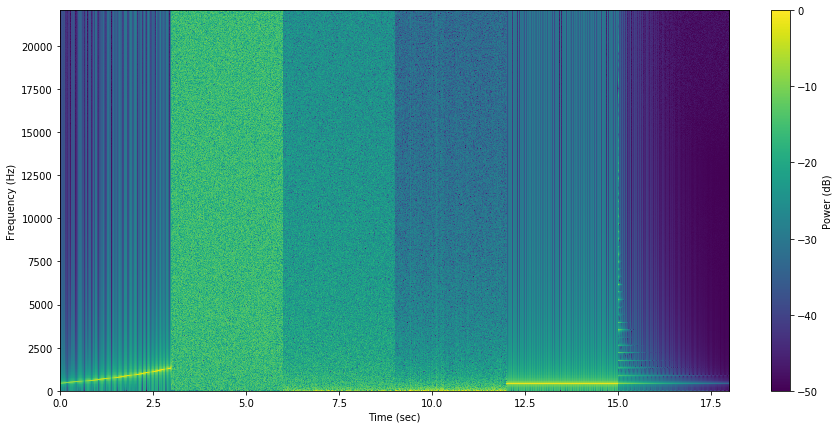

In [2]:
audio_base_path = 'audio/'
audio_file_name = 'test.wav'
fs, audio_data = read_wav_audio(audio_base_path + audio_file_name)
plot_specgram(audio_data, fs, n_overlap=512, colorbar=True, labels=True, eps=1e-5)